In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping

In [2]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [3]:
trainning_set = dataset_train.iloc[:,1:2].values
trainning_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [4]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_dataset = scaler.fit_transform(trainning_set)
scaled_dataset

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [5]:
scaled_dataset.shape

(1258, 1)

In [6]:
x_train = []
y_train = []
for i in range(120,1258):
    x_train.append(scaled_dataset[i-120:i,0])
    y_train.append(scaled_dataset[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)                   

In [7]:
print(x_train.shape, '\t', y_train.shape)

(1138, 120) 	 (1138,)


In [8]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1138, 120, 1)

In [55]:
modelo = Sequential()
modelo.add(LSTM(units = 100, return_sequences = True, input_shape=(x_train.shape[1],1)))
modelo.add(LSTM(units = 100, return_sequences = True))
modelo.add(Dropout(0.25))

modelo.add(LSTM(units = 100, return_sequences = True))
modelo.add(LSTM(units = 50))

modelo.add(Dropout(0.25))
modelo.add(Dense(units = 1))



C:\Users\roni_\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [57]:
modelo.compile(optimizer = 'adam', loss = 'mean_squared_error')
es = EarlyStopping(monitor = 'loss', mode = 'min', verbose = 3, patience = 35)
modelo.fit(x_train, y_train, epochs = 300, callbacks = [es])

Epoch 1/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step - loss: 0.0748
Epoch 2/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - loss: 0.0061
Epoch 3/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - loss: 0.0073
Epoch 4/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - loss: 0.0048
Epoch 5/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - loss: 0.0054
Epoch 6/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - loss: 0.0049
Epoch 7/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - loss: 0.0049
Epoch 8/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - loss: 0.0047
Epoch 9/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - loss: 0.0047
Epoch 10/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - loss: 0.0040
Epoch 11/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - loss: 0.0040
Epoch 12/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - loss: 0.0045
Epoch 13/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - loss: 0.0043
Epoch 14/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - loss: 0.0040
Epoch 15/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s

In [93]:
print(modelo.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 120, 100)       │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 120, 100)       │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 120, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 120, 100)       │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 695,555 (2.65 MB)

 Trainable params: 231,851 (905.67 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 463,704 (1.77 MB)

None


In [59]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
dataset_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [61]:
real_price = dataset_test.iloc[:,1:2].values
real_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [63]:
dataset_total = pd.concat((dataset_train["Open"], dataset_test["Open"]), axis = 0)
dataset_total

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [65]:
inputs = dataset_total[len(dataset_total) -len(dataset_test) -120:].values
inputs

array([723.62, 721.58, 725.73, 722.71, 729.89, 737.33, 740.36, 741.86,
       740.67, 739.04, 738.28, 747.04, 772.71, 761.09, 768.69, 767.18,
       772.22, 773.78, 782.  , 781.1 , 783.75, 785.  , 781.5 , 783.75,
       780.3 , 777.32, 780.01, 775.  , 773.27, 775.48, 770.58, 767.  ,
       769.  , 768.74, 769.33, 767.01, 769.25, 773.01, 773.45, 780.  ,
       778.59, 770.1 , 755.13, 764.48, 759.61, 762.89, 769.75, 772.42,
       769.  , 772.66, 780.  , 786.59, 782.74, 775.5 , 777.85, 781.44,
       776.33, 774.25, 776.03, 779.31, 779.  , 779.66, 777.71, 786.66,
       783.76, 781.22, 781.65, 779.8 , 787.85, 798.24, 803.3 , 795.  ,
       804.9 , 816.68, 806.34, 801.  , 808.35, 795.47, 782.89, 778.2 ,
       767.25, 750.66, 774.5 , 783.4 , 779.94, 791.17, 756.54, 755.6 ,
       746.97, 755.2 , 766.92, 771.37, 762.61, 772.63, 767.73, 764.26,
       760.  , 771.53, 770.07, 757.44, 744.59, 757.71, 764.73, 761.  ,
       772.48, 780.  , 785.04, 793.9 , 797.4 , 797.34, 800.4 , 790.22,
      

In [67]:
print(inputs.shape)

(140,)


In [91]:
inputs = inputs.reshape(-1,1)
inputs.shape

(140, 1)

In [85]:
inputs = scaler.transform(inputs)
inputs.mean()

-0.5202027732046619

In [73]:
x_test = []
for i in range(120,140):
    x_test.append(inputs[i-120:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))
predicted = modelo.predict(x_test)
real_predicted = scaler.inverse_transform(predicted)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


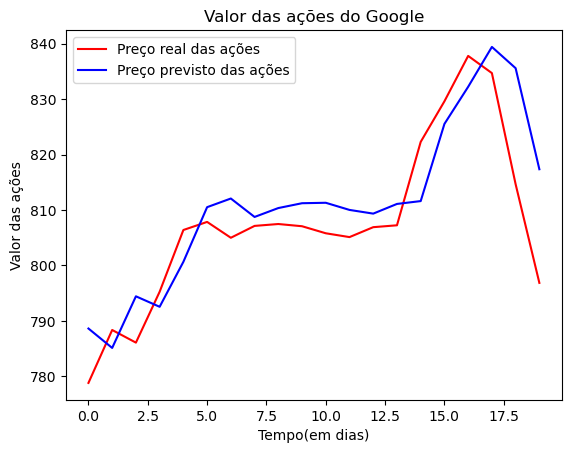

In [102]:
plt.plot(real_price, color = 'red', label = "Preço real das ações")
plt.plot(real_predicted, color = 'blue', label = 'Preço previsto das ações')
plt.legend()
plt.title("Valor das ações do Google")
plt.xlabel("Tempo(em dias)")
plt.ylabel("Valor das ações")
plt.show()